Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

Checking data

In [2]:
train = pd.read_csv(r'C:\Users\mukes\Downloads\train (3).csv')
test = pd.read_csv(r'C:\Users\mukes\Downloads\test (2).csv')


Five Number Summery

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)

train data shape:  (1460, 81)
test data shape:  (1459, 80)


In [6]:
print('trainig data info:\n ', train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
print('testing data info : \n', test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Summary of training dataset

In [8]:
print('Summary of trainig data: \n')
train.describe()

Summary of trainig data: 



Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Summary of testing data set

In [9]:
print('Summary of test data: \n')
test.describe()

Summary of test data: 



Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

Plotting Sale Price Distribution 

Sale Price Distribution


[]

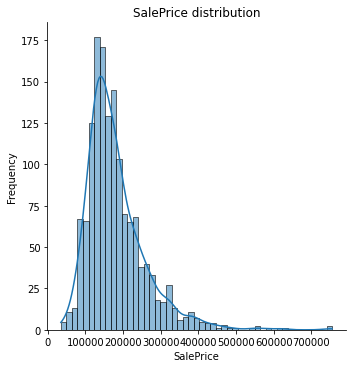

In [10]:
print('Sale Price Distribution')
sns.displot(train['SalePrice'], kde = True)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.plot()

Plotting Q-Q Plot of Sale Price 

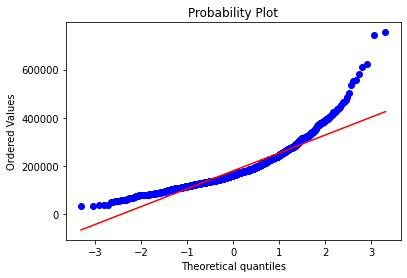

In [11]:
from scipy import stats
plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)

So, Our Target Variable(Sale Price) is right skewed. So we will apply Log transformation on our target variable data. But before that we need to make sure that is our data values must be greater than zero 

In [12]:
negative_values = [] #Creating empty list to Store values
for values in train['SalePrice']:
    if values <= 0: # Checking values negative or zero in SalePrice Column
        negative_values.append(values) # Storing values in the emty list container

negative_values #Printing Negative and zero values


[]

Checking missing values in % in training dataset

In [13]:
features_with_na_train = [features for features in train.columns if train[features].isnull().sum() > 1]
for feature in features_with_na_train:
    print(feature, np.round(train[feature].isnull().mean(), 2), '% missing values')
    

LotFrontage 0.18 % missing values
Alley 0.94 % missing values
MasVnrType 0.01 % missing values
MasVnrArea 0.01 % missing values
BsmtQual 0.03 % missing values
BsmtCond 0.03 % missing values
BsmtExposure 0.03 % missing values
BsmtFinType1 0.03 % missing values
BsmtFinType2 0.03 % missing values
FireplaceQu 0.47 % missing values
GarageType 0.06 % missing values
GarageYrBlt 0.06 % missing values
GarageFinish 0.06 % missing values
GarageQual 0.06 % missing values
GarageCond 0.06 % missing values
PoolQC 1.0 % missing values
Fence 0.81 % missing values
MiscFeature 0.96 % missing values


Checking missing values in % in testing dataset

In [14]:
features_with_na_test = [features for features in test.columns if test[features].isnull().sum() > 1]
for feature in features_with_na_test:
    print(feature, np.round(test[feature].isnull().mean()), 2, '% missing values')

MSZoning 0.0 2 % missing values
LotFrontage 0.0 2 % missing values
Alley 1.0 2 % missing values
Utilities 0.0 2 % missing values
MasVnrType 0.0 2 % missing values
MasVnrArea 0.0 2 % missing values
BsmtQual 0.0 2 % missing values
BsmtCond 0.0 2 % missing values
BsmtExposure 0.0 2 % missing values
BsmtFinType1 0.0 2 % missing values
BsmtFinType2 0.0 2 % missing values
BsmtFullBath 0.0 2 % missing values
BsmtHalfBath 0.0 2 % missing values
Functional 0.0 2 % missing values
FireplaceQu 1.0 2 % missing values
GarageType 0.0 2 % missing values
GarageYrBlt 0.0 2 % missing values
GarageFinish 0.0 2 % missing values
GarageQual 0.0 2 % missing values
GarageCond 0.0 2 % missing values
PoolQC 1.0 2 % missing values
Fence 1.0 2 % missing values
MiscFeature 1.0 2 % missing values


Checking missing values and plotting same

In [15]:
missing_values_train = train.isnull().sum().sort_values(ascending=False)
missing_values_train

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

Plotting missing values in training dataset:

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

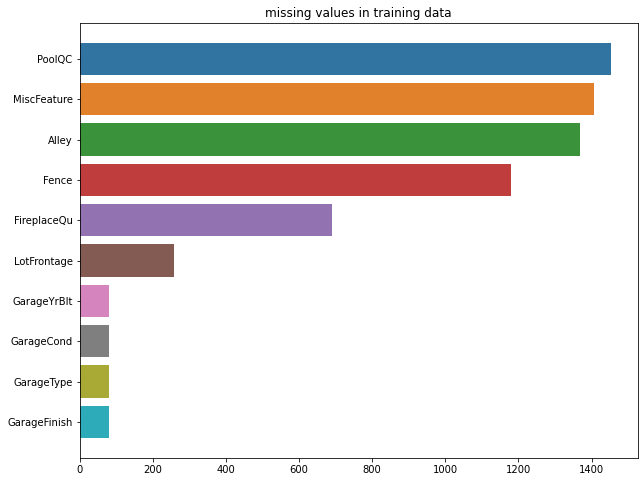

In [16]:
x_axis = missing_values_train[:10]
y_axis = missing_values_train[:10].index
plt.figure(figsize=(10, 8))
sns.barplot(x_axis, y_axis)
plt.title('missing values in training data')
plt.plot()

Checking test dataset missing values and Plotting the same 

In [17]:
missing_values_test = test.isnull().sum()
missing_values_test

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

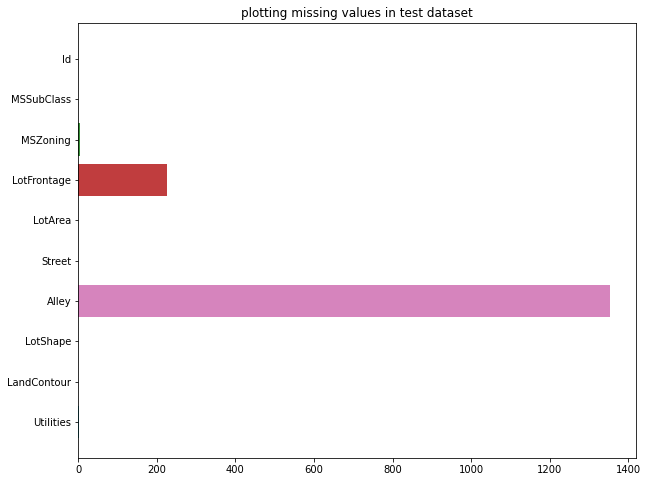

In [18]:
x_axis = missing_values_test[:10]
y_axis = missing_values_test[:10].index
plt.figure(figsize=(10, 8))
sns.barplot(x_axis, y_axis)
plt.title('plotting missing values in test dataset')
plt.plot()

In [19]:
train.shape, test.shape

((1460, 81), (1459, 80))

Since there are lots of missing values in training data set we need to find relationship between sale price and the features

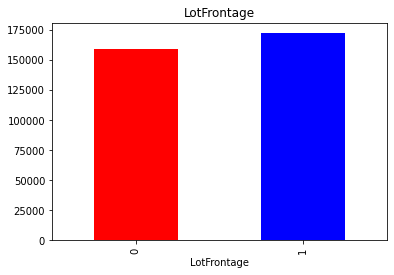

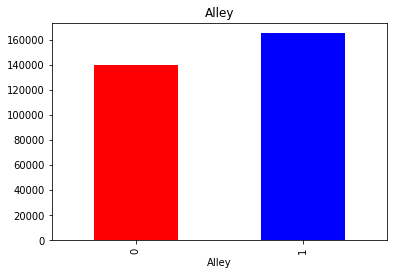

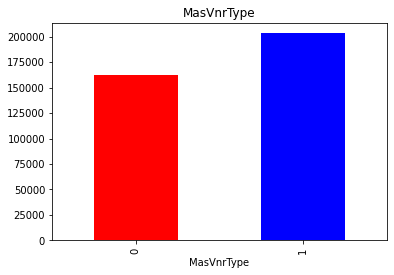

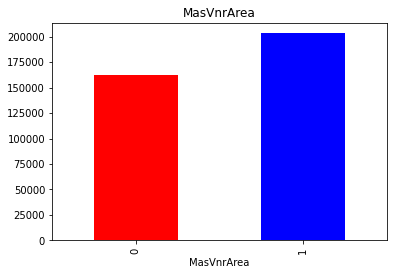

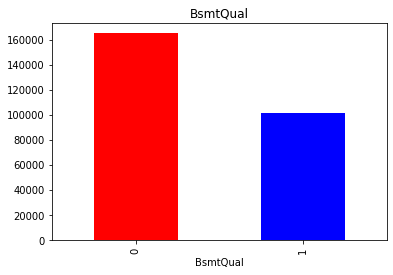

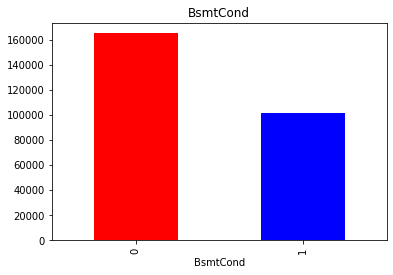

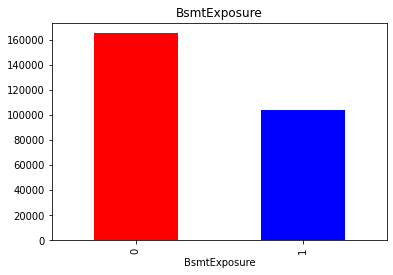

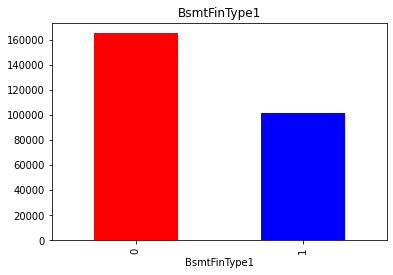

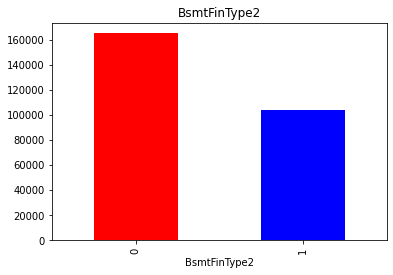

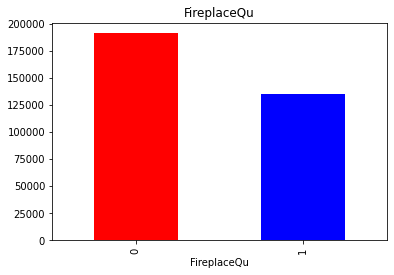

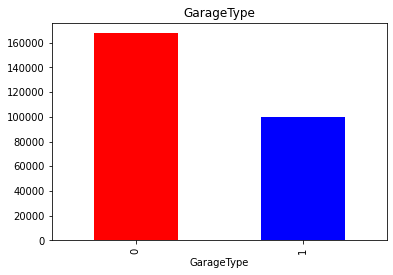

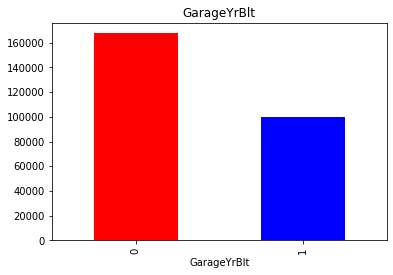

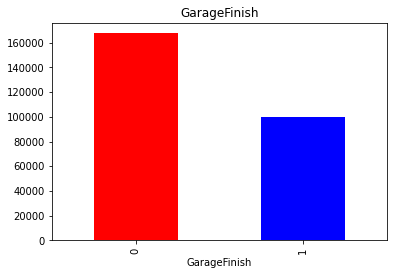

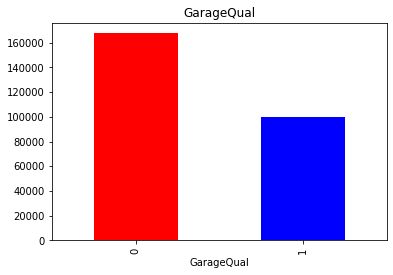

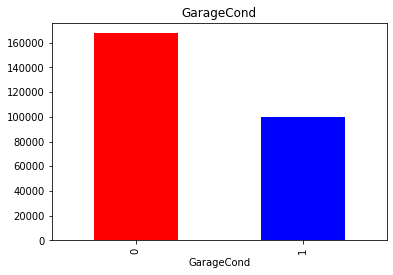

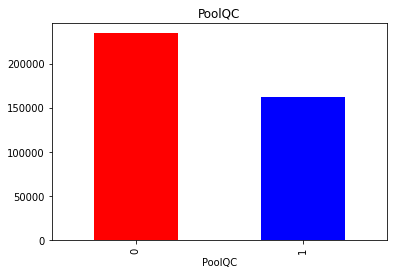

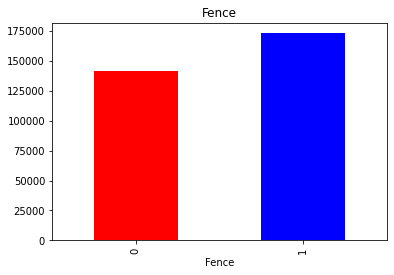

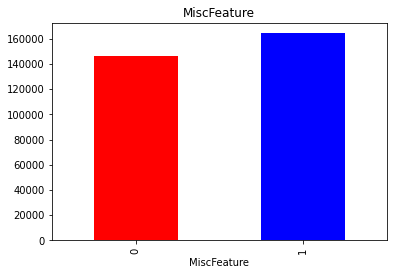

In [20]:
for feature in features_with_na_train:
    data_train = train.copy()
    #If values are missing then 1 otherwise 0
    data_train[feature] = np.where(data_train[feature].isnull(), 1, 0)
    #lets calculate the median Sale Price where the information is missing or present
    data_train.groupby(feature)['SalePrice'].median().plot.bar(color = ['red', 'blue'])
    
    plt.title(feature)
    plt.show()

Numerical variables in Train dataset:

In [21]:
numerical_features_train = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('Number of Numerical Feature of train data: ', len(numerical_features_train))
train[numerical_features_train].head()

Number of Numerical Feature of train data:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

Numerical variables in Test dataset

In [22]:
numerical_features_test = [feature for feature in test.columns if train[feature].dtypes != 'O']
print('numerical features of test data: ', len(numerical_features_test))
test[numerical_features_test].head()

numerical features of test data:  37


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0       1961          1961         0.0       468.0  ...       730.0   
1       1958          1958       108.0       923.0  ...       312.0   
2       1997          1998         0.0       791.0  ...       482.0   
3       1998          1998        20.0       602.0  ...       470.0   
4       1992          1992         0.0       263.0  ...       506.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         140            0              0          0          120         0   
1         393           36              0          0            0         0   
2         212           34              0          0            0         0   
3         360           36              0          0            0         0   
4           0           82              0          0          144         0   

   MiscVal  MoSold  YrSold  
0        0       6    2010  
1    12500       6    2010  
2        0       3    2010  
3        0       6    2010  
4        0       1    2010  

[5 rows x 37 columns]

Temopral Features in train dataset

In [23]:
temporal_features_train = [feature for feature in numerical_features_train if 'Yr' in feature or 'Year' in feature]
temporal_features_train

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [24]:
for feature in temporal_features_train:
    print(feature, train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

temporal feature in test dataset

In [25]:
temporal_features_test = [feature for feature in numerical_features_test if 'Yr' in feature or 'Year' in feature]
temporal_features_test

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
for feature in temporal_features_test:
    print(feature, test[feature].unique())

YearBuilt [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932]
YearRemodAdd [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]
GarageYrBlt [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974.

Lets analyze the Temporal Datetime Variables
We will check whether there is a relation between the year and the house sold and the sales price for train dataset

In [27]:
train.shape, test.shape

((1460, 81), (1459, 80))

Text(0.5, 1.0, 'House price vs YearSold')

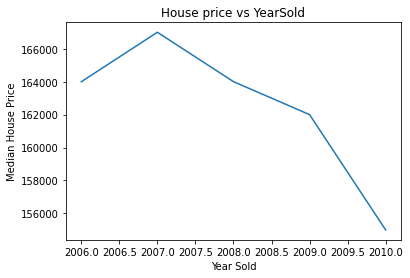

In [28]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House price vs YearSold')

Here we will compare the difference between All years feature with SalePrice

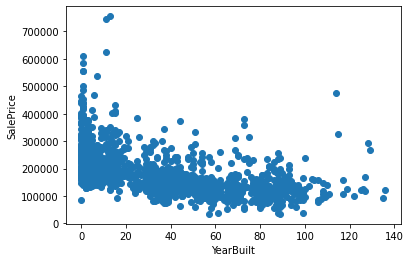

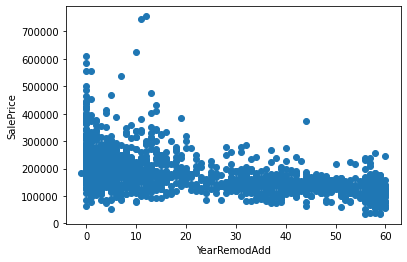

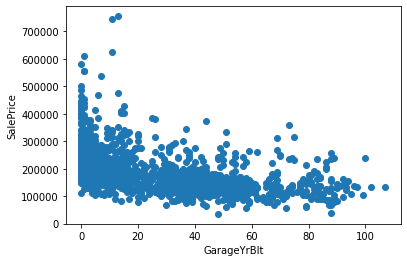

In [29]:
for feature in temporal_features_train:
    if feature != 'YrSold':
        data_train = train.copy()
        
        data_train[feature] = data_train['YrSold']-data_train[feature]
        plt.scatter(data_train[feature], data_train['SalePrice'])
        
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [30]:
train.shape, test.shape

((1460, 81), (1459, 80))

Numerical variables are usually of 2 type. Continous variable and Discrete Variables. So extracting Discrete Features in training data

In [31]:
discrete_features_train = [feature for feature in numerical_features_train if len(train[feature].unique()) < 25 and feature not in temporal_features_train + ['Id']]
print('Discrete Variables Count: {}'.format(len(discrete_features_train)))

Discrete Variables Count: 17


In [32]:
discrete_features_train

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [33]:
train[discrete_features_train].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

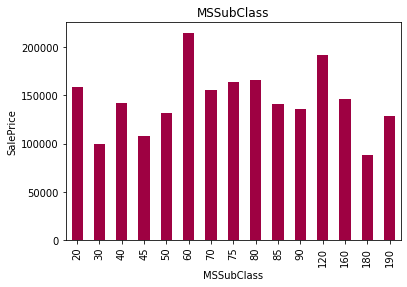

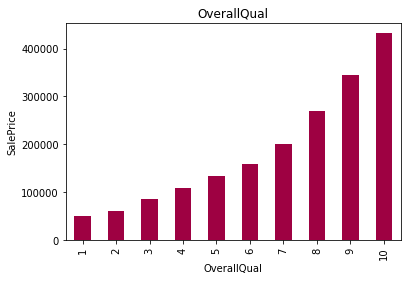

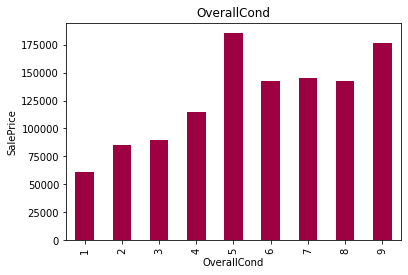

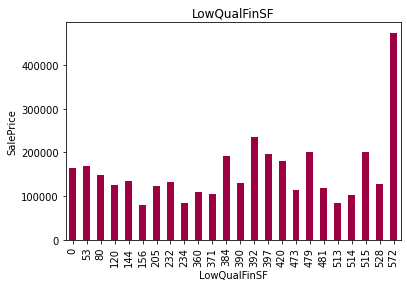

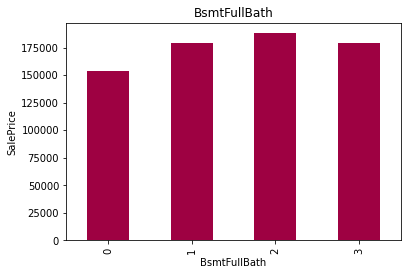

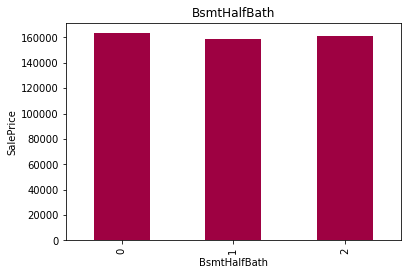

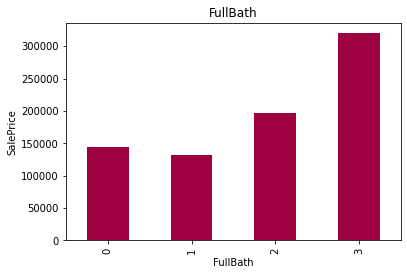

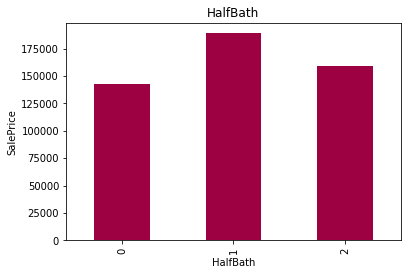

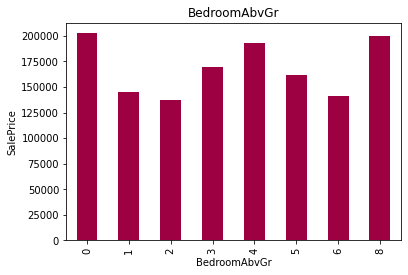

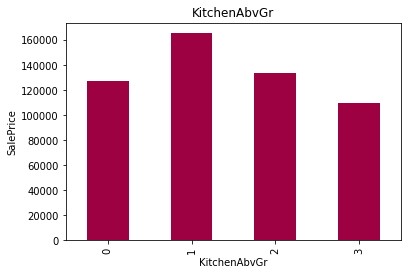

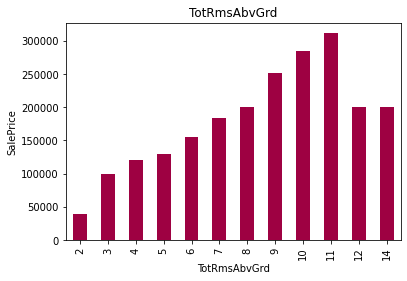

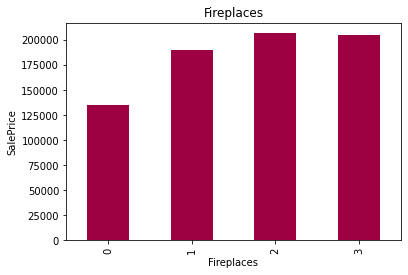

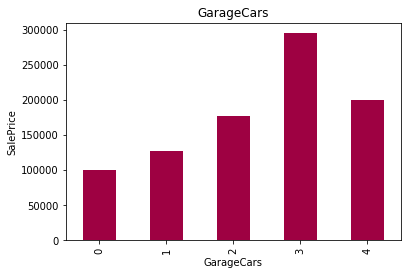

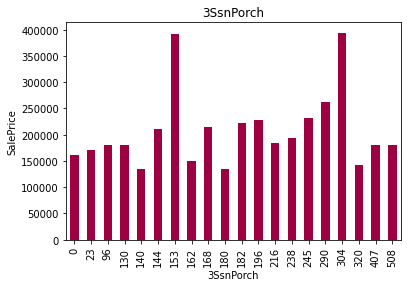

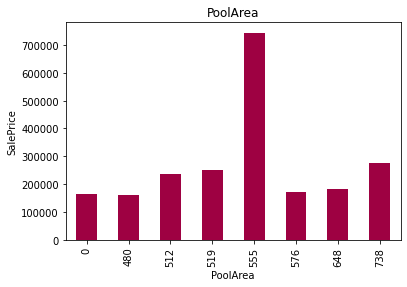

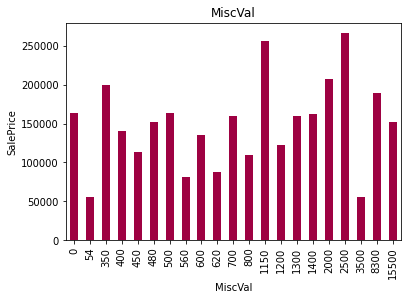

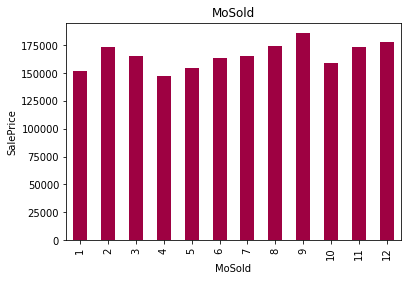

In [34]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
for feature in discrete_features_train:
    data_train = train.copy()
    data_train.groupby(feature)['SalePrice'].median().plot.bar( cmap = cmap, stacked= False)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [35]:
train.shape, test.shape

((1460, 81), (1459, 80))

Discrete feartures in Test dataset

In [36]:
discrete_features_test = [feature for feature in numerical_features_test if len(test[feature].unique()) < 25 and feature not in temporal_features_test + ['Id']]
discrete_features_test

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold']

In [37]:
test[discrete_features_test].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          20            5            6             0           0.0   
1          20            6            6             0           0.0   
2          60            5            5             0           0.0   
3          60            6            6             0           0.0   
4         120            8            5             0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MoSold  
0           0         1.0          0         0       6  
1           0         1.0          0         0       6  
2           1         2.0          0         0       3  
3           1         2.0          0         0       6  
4           0         2.0          0         0       1

Continous feature of training dataset

In [38]:
continuos_feature_train = [feature for feature in numerical_features_train if feature not in discrete_features_train + ['Id'] + temporal_features_train] 
print('continuos feature Count {}'.format(len(continuos_feature_train)))
continuos_feature_train

continuos feature Count 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [39]:
train[continuos_feature_train].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

Plotting Continous features

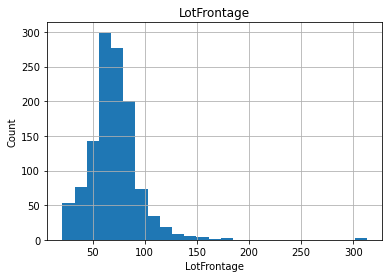

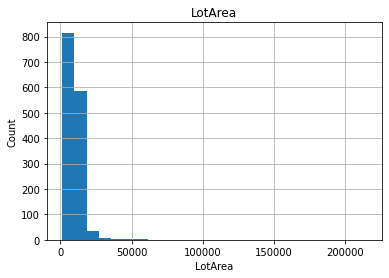

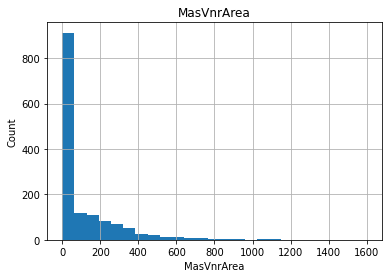

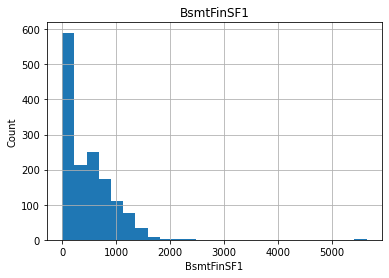

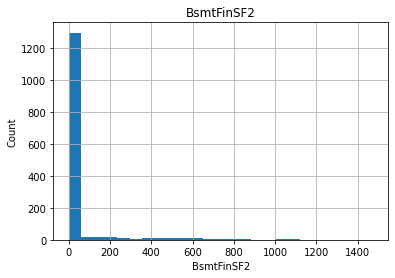

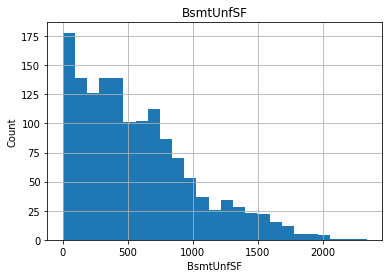

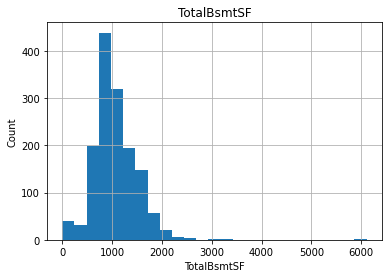

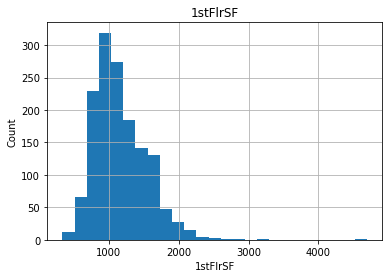

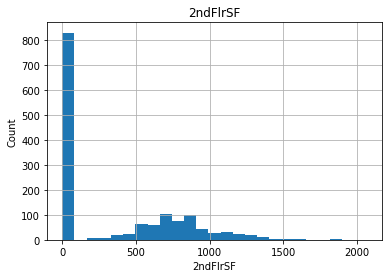

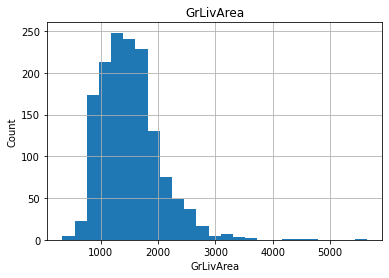

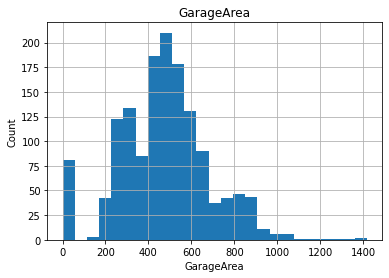

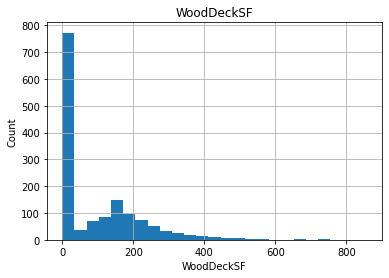

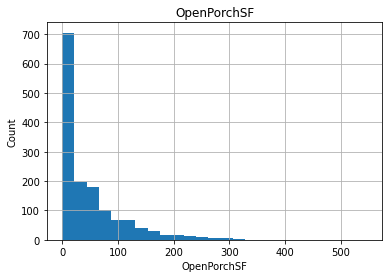

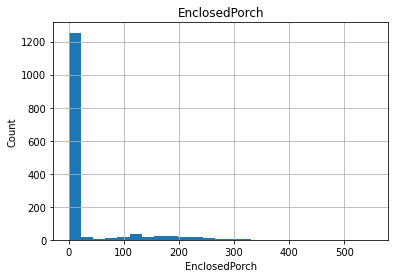

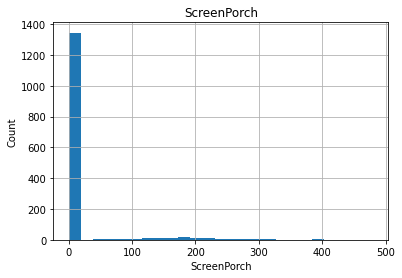

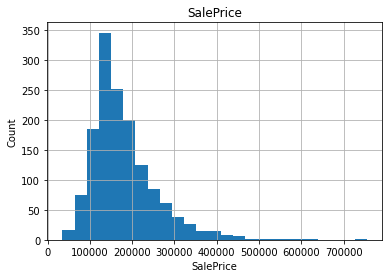

In [40]:
for feature in continuos_feature_train:
    data_train = train.copy()
    data_train[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Continous Features of test dataset

In [41]:
continuos_feature_test = [feature for feature in numerical_features_test if feature not in temporal_features_test + discrete_features_test + ['Id']]
print('Total number of continous feature in test data: {}'.format(len(continuos_feature_test)))
continuos_feature_test

Total number of continous feature in test data: 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal']

Applying Log Transformation to our continuos features of training data

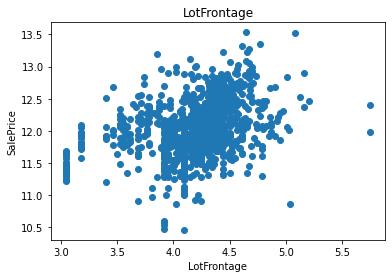

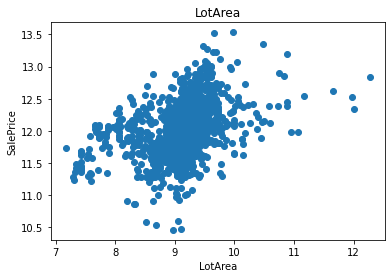

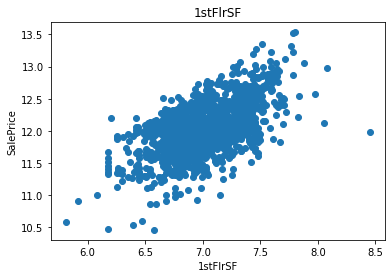

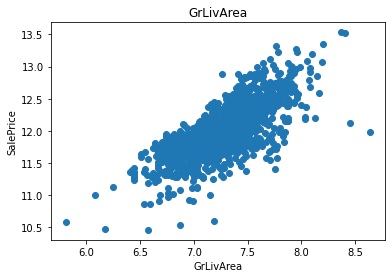

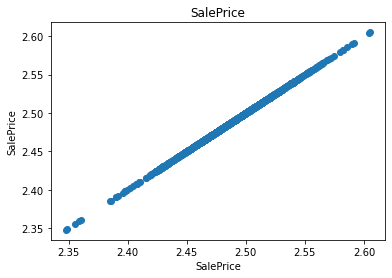

In [42]:
for feature in continuos_feature_train:
    data_train = train.copy()
    if 0 in data_train[feature].unique():
        pass
    else:
        data_train[feature] = np.log(data_train[feature])
        data_train['SalePrice']=np.log(data_train['SalePrice'])
        plt.scatter(data_train[feature], data_train['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

In [43]:
train.shape, test.shape

((1460, 81), (1459, 80))

Applying Log Transformation to our continuos features of testing data

In [44]:
for feature in continuos_feature_test:
    data_test = test.copy()
    if 0 in data_test[feature].unique():
        pass
    else:
        data_test[feature] = np.log(data_test[feature])
         

Outliers in Continuos Feature of training dataset

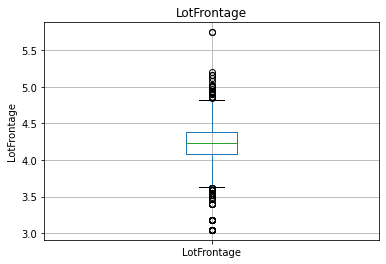

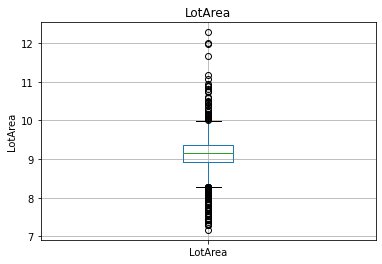

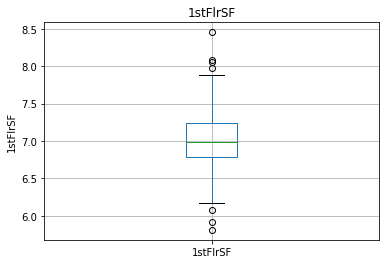

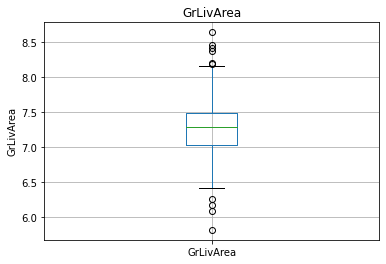

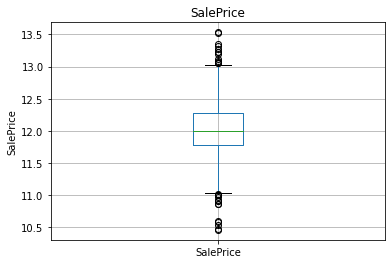

In [45]:
for feature in continuos_feature_train:
    data_train = train.copy()
    if 0 in data_train[feature].unique():
        pass
    else:
        data_train[feature] = np.log(data_train[feature])
        data_train.boxplot(column=feature)
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

Outliers in continuos feature of test dataset

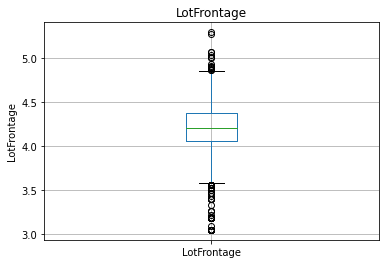

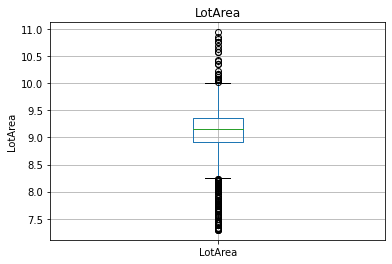

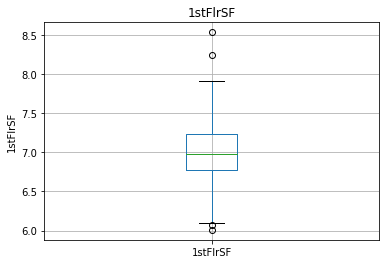

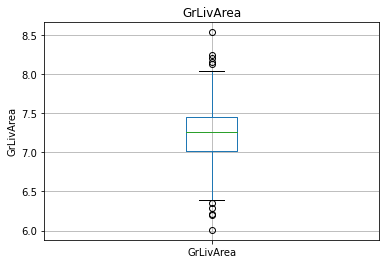

In [46]:
for feature in continuos_feature_test:
    data_test = test.copy()
    if 0 in data_test[feature].unique():
        pass
    else:
        data_test[feature] = np.log(data_test[feature])
        data_test.boxplot(column=feature)
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

extracting categorical features from trainig dataset

In [47]:
categorical_feature_train = [feature for feature in train.columns if data_train[feature].dtypes == 'O']
categorical_feature_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Extracting categorical features from test dataset

In [48]:
categorical_feature_test = [feature for feature in test.columns if data_test[feature].dtypes == 'O']
categorical_feature_test

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [49]:
test[categorical_feature_train].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0        NAmes      Feedr  ...     Attchd          Unf         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
3      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
4      StoneBr       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN  MnPrv         NaN       WD        Normal  
1          Y    NaN    NaN        Gar2       WD        Normal  
2          Y    NaN  MnPrv         NaN       WD        Normal  
3          Y    NaN    NaN         NaN       WD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [50]:
train[categorical_feature_test].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [51]:
train.shape, test.shape

((1460, 81), (1459, 80))

Finding Number of categories in each categorical features in training dataset

In [52]:
for feature in categorical_feature_train:
    print('The feature is {} and number of categories are {}'.format(feature, len(test[feature].unique())))

The feature is MSZoning and number of categories are 6
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 5
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 7
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 4
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

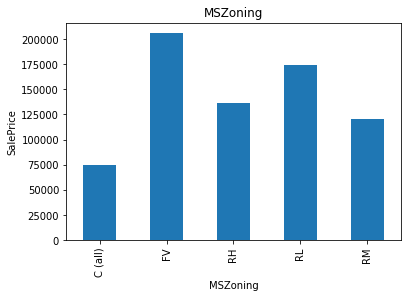

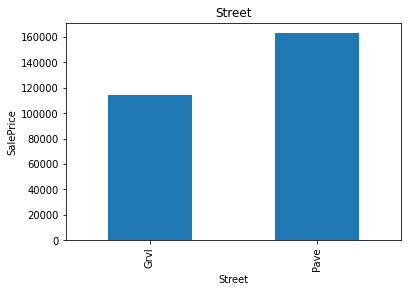

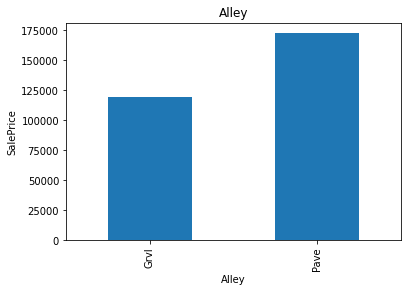

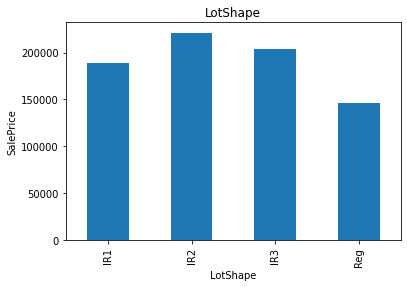

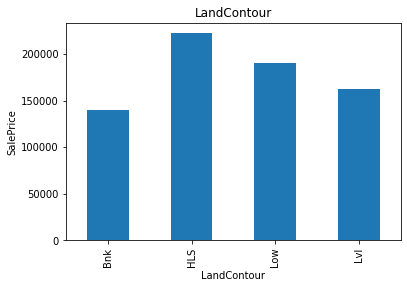

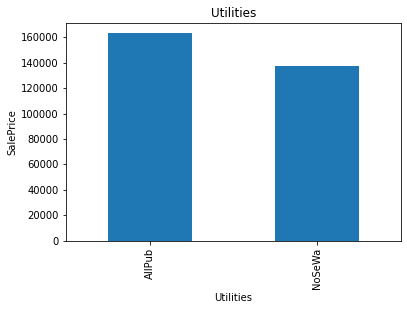

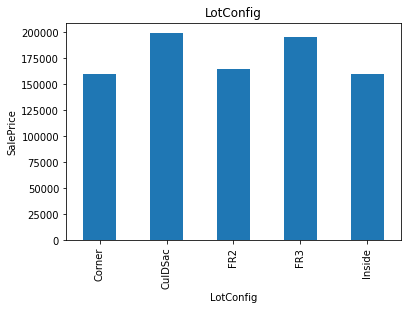

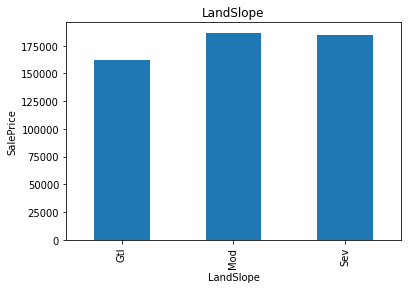

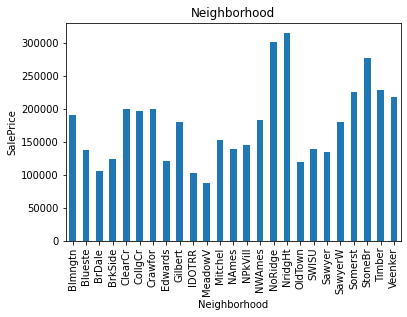

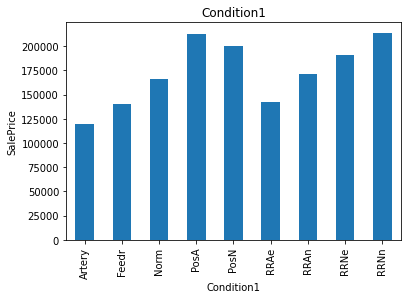

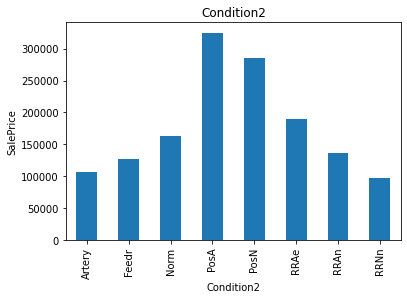

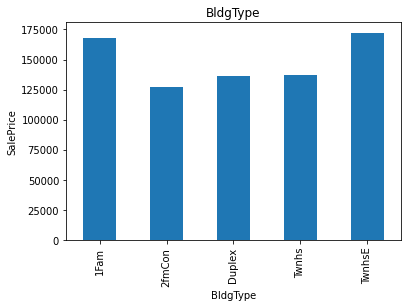

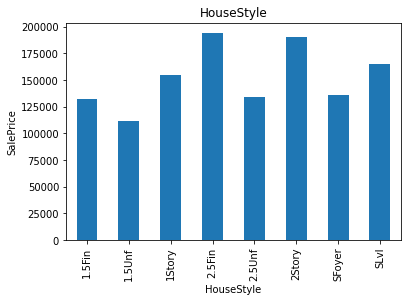

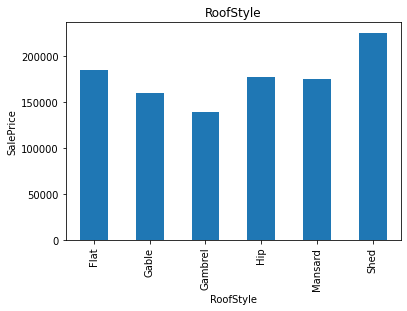

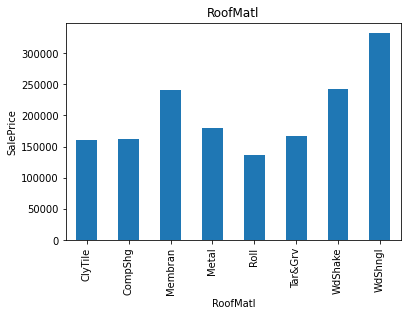

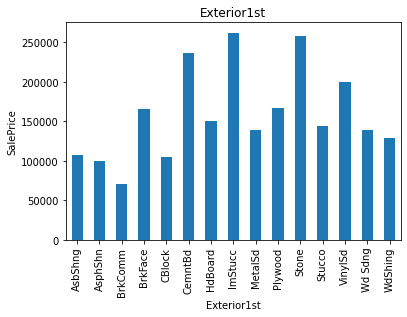

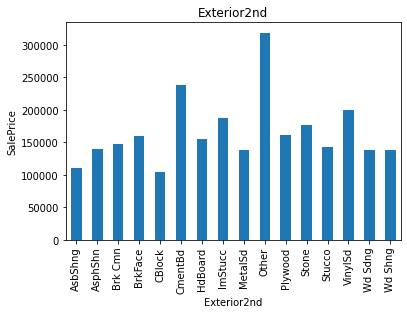

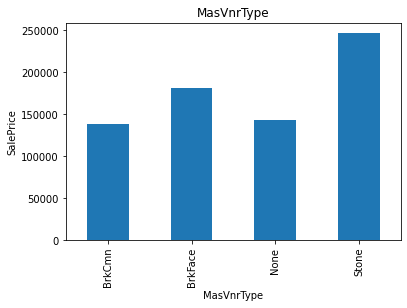

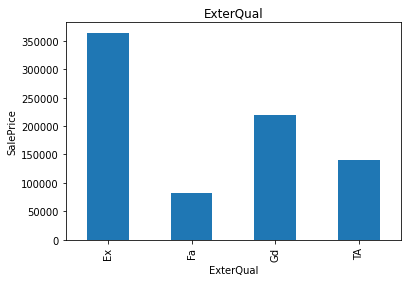

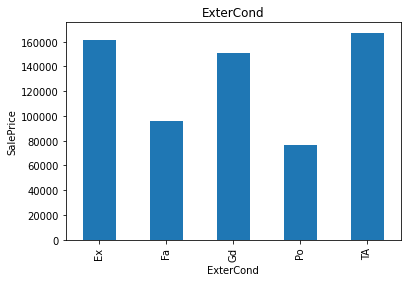

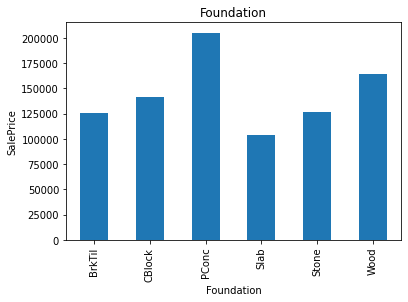

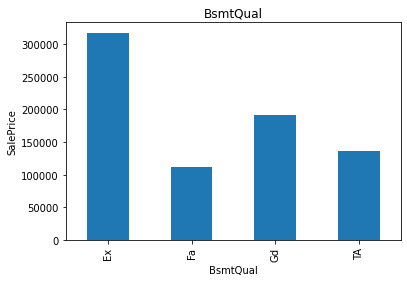

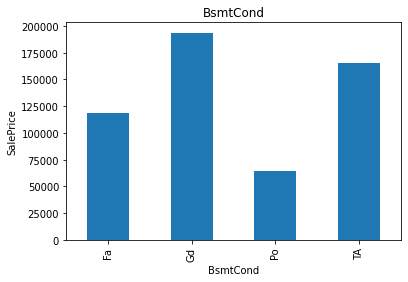

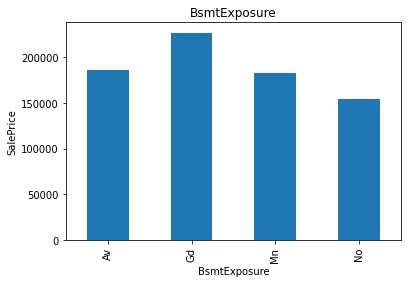

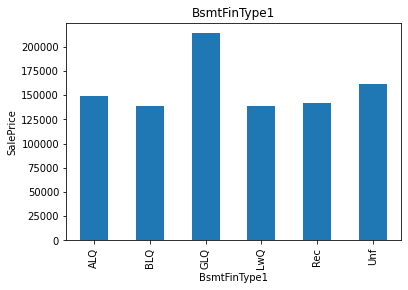

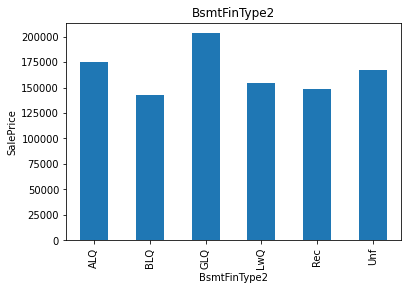

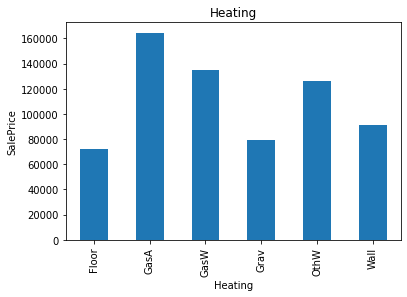

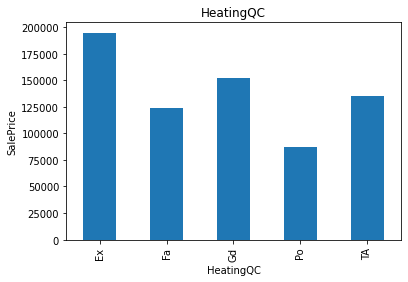

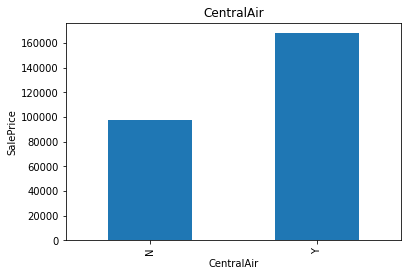

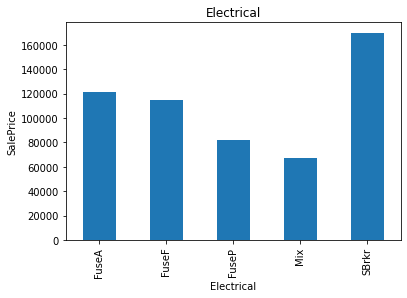

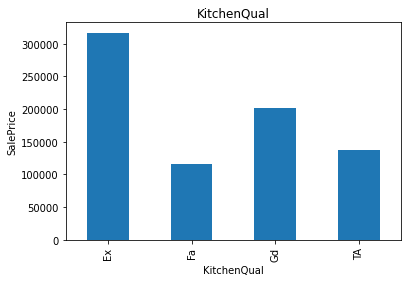

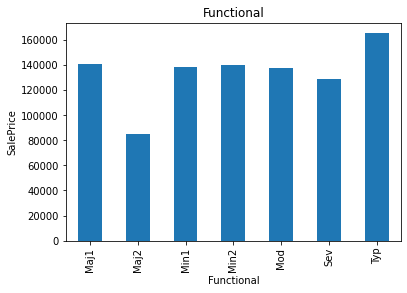

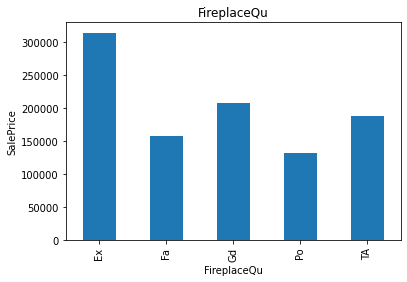

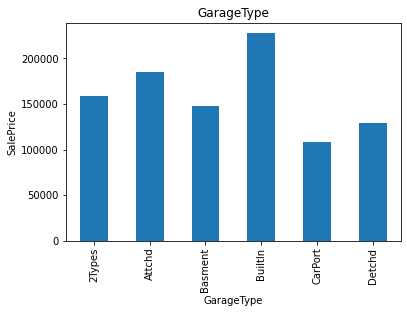

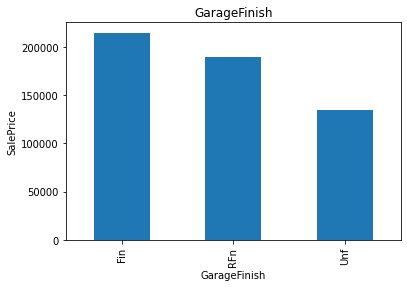

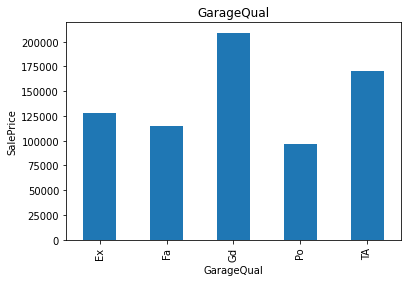

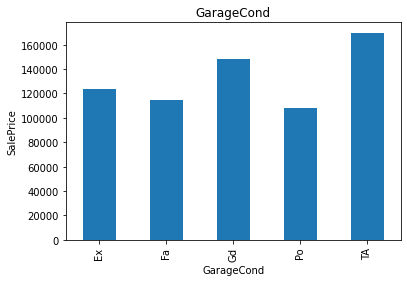

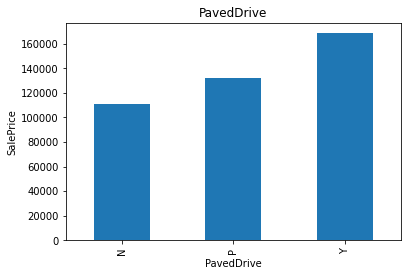

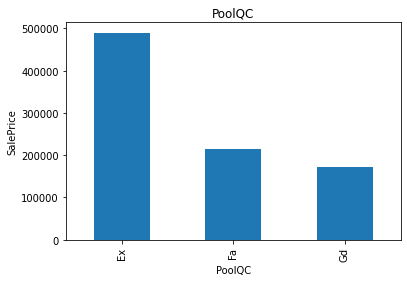

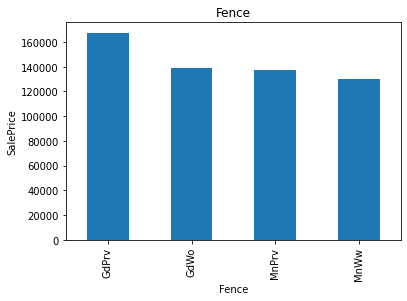

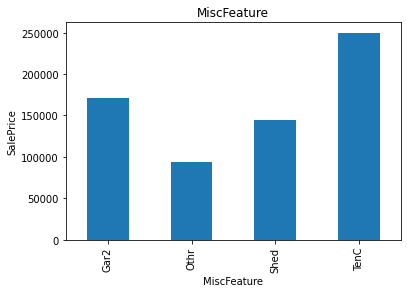

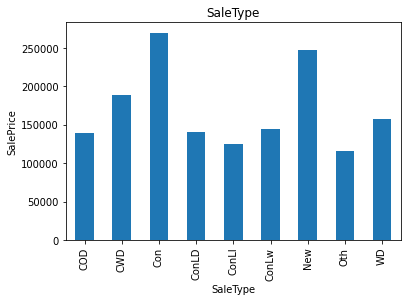

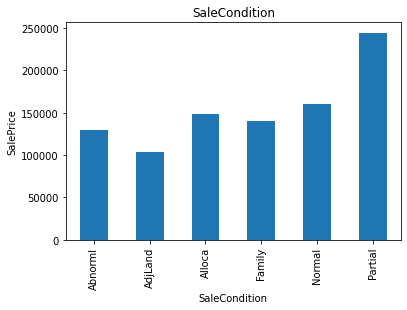

In [53]:
for feature in categorical_feature_train:
    data_train = train.copy()
    data_train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Finding number categories in each categorical feature of testing dataset

In [54]:
test[categorical_feature_test].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0        NAmes      Feedr  ...     Attchd          Unf         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
3      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
4      StoneBr       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN  MnPrv         NaN       WD        Normal  
1          Y    NaN    NaN        Gar2       WD        Normal  
2          Y    NaN  MnPrv         NaN       WD        Normal  
3          Y    NaN    NaN         NaN       WD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [55]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [56]:
for feature in categorical_feature_test:
    print('The feature is {} and number of categories are {}'.format(feature, len(test[feature].unique())))

The feature is MSZoning and number of categories are 6
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 5
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 7
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 4
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

Finding missing values training dataset

In [57]:
categorical_feature_nan_train = [feature for feature in train.columns if train[feature].isnull().sum() > 1 and train[feature].dtypes == 'O']
for feature in categorical_feature_nan_train:
    print('{}: {}% missing values'.format(feature, np.round(train[feature].isnull().mean(), 4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


Finding missing values in testing dataset

In [58]:
categorical_feature_nan_test = [feature for feature in test.columns if test[feature].isnull().sum() > 1 and test[feature].dtypes == 'O']
for feature in categorical_feature_nan_test:
    print('{}: {}% missing values'.format(feature, np.round(test[feature].isnull().mean(), 4)))

MSZoning: 0.0027% missing values
Alley: 0.9267% missing values
Utilities: 0.0014% missing values
MasVnrType: 0.011% missing values
BsmtQual: 0.0302% missing values
BsmtCond: 0.0308% missing values
BsmtExposure: 0.0302% missing values
BsmtFinType1: 0.0288% missing values
BsmtFinType2: 0.0288% missing values
Functional: 0.0014% missing values
FireplaceQu: 0.5003% missing values
GarageType: 0.0521% missing values
GarageFinish: 0.0535% missing values
GarageQual: 0.0535% missing values
GarageCond: 0.0535% missing values
PoolQC: 0.9979% missing values
Fence: 0.8012% missing values
MiscFeature: 0.965% missing values


Finding missing values in numerical feature of training dataset

In [59]:
numerical_features_nan_train = [feature for feature in train.columns if train[feature].isnull().sum() > 1 and train[feature].dtypes != 'O']
for feature in numerical_features_nan_train:
    print('{}: {}% missing values'.format(feature, np.round(train[feature].isnull().mean(), 4)))

LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


Finding missing values in numerical feature of testing dataset

In [60]:
numerical_features_nan_test = [feature for feature in test.columns if test[feature].isnull().sum() > 1 and test[feature].dtypes != 'O']
for feature in numerical_features_nan_test:
    print('{}: {}% missing values are'.format(feature, np.round(test[feature].isnull().mean(), 4)))

LotFrontage: 0.1556% missing values are
MasVnrArea: 0.0103% missing values are
BsmtFullBath: 0.0014% missing values are
BsmtHalfBath: 0.0014% missing values are
GarageYrBlt: 0.0535% missing values are


In [61]:
train.shape, test.shape

((1460, 81), (1459, 80))

Replacing missing values with median value in trainig dataset and testing dataset respectively

trainig dataset

In [62]:
for feature in numerical_features_nan_train:
    median_value = train[feature].median()

    train[feature + 'nan'] = np.where(train[feature].isnull(), 1, 0)
    train[feature].fillna(median_value, inplace=True)
train[numerical_features_nan_train].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [63]:
train.shape, test.shape

((1460, 84), (1459, 80))

In [64]:
train[numerical_features_nan_train].head(15)

LotFrontage  MasVnrArea  GarageYrBlt
0          65.0       196.0       2003.0
1          80.0         0.0       1976.0
2          68.0       162.0       2001.0
3          60.0         0.0       1998.0
4          84.0       350.0       2000.0
5          85.0         0.0       1993.0
6          75.0       186.0       2004.0
7          69.0       240.0       1973.0
8          51.0         0.0       1931.0
9          50.0         0.0       1939.0
10         70.0         0.0       1965.0
11         85.0       286.0       2005.0
12         69.0         0.0       1962.0
13         91.0       306.0       2006.0
14         69.0       212.0       1960.0

In [65]:
train.shape, test.shape

((1460, 84), (1459, 80))

In [66]:
train.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL         69.0    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL         69.0    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL         69.0    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL         69.0    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL         69.0     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL         69.0     8544   Pave   NaN      IR1   
32  33          20       RL         85.0    11049   Pave   NaN      Reg   
33  34          20       RL         70.0    10552   Pave   NaN      IR1   
34  35         120       RL         60.0     7313   Pave   NaN      Reg   
35  36          60       RL        108.0    13418   Pave   NaN      Reg   
36  37          20       RL        112.0    10859   Pave   NaN      Reg   
37  38          20       RL         74.0     8532   Pave   NaN      Reg   
38  39          20       RL         68.0     7922   Pave   NaN      Reg   
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
40  41          20       RL         84.0     8658   Pave   NaN      Reg   
41  42          20       RL        115.0    16905   Pave   NaN      Reg   
42  43          85       RL         69.0     9180   Pave   NaN      IR1   
43  44          20       RL         69.0     9200   Pave   NaN      IR1   
44  45          20       RL         70.0     7945   Pave   NaN      Reg   
45  46         120       RL         61.0     7658   Pave   NaN      Reg   
46  47          50       RL         48.0    12822   Pave   NaN      IR1   
47  48          20       FV         84.0    11096   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
49  50          20       RL         66.0     7742   Pave   NaN      Reg   

   LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0          Lvl    AllPub  ...         NaN       0      2   2008       WD   
1          Lvl    AllPub  

Testing Dataset

In [67]:
for feature in numerical_features_nan_test:
    median_value = test[feature].median()

    test[feature + 'nan'] = np.where(test[feature].isnull(), 1, 0)
    test[feature].fillna(median_value, inplace=True)
test[numerical_features_nan_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [68]:
test[numerical_features_nan_test].head(15)

LotFrontage  MasVnrArea  BsmtFullBath  BsmtHalfBath  GarageYrBlt
0          80.0         0.0           0.0           0.0       1961.0
1          81.0       108.0           0.0           0.0       1958.0
2          74.0         0.0           0.0           0.0       1997.0
3          78.0        20.0           0.0           0.0       1998.0
4          43.0         0.0           0.0           0.0       1992.0
5          75.0         0.0           0.0           0.0       1993.0
6          67.0         0.0           1.0           0.0       1992.0
7          63.0         0.0           0.0           0.0       1998.0
8          85.0         0.0           1.0           0.0       1990.0
9          70.0         0.0           1.0           0.0       1970.0
10         26.0         0.0           1.0           0.0       1999.0
11         21.0       504.0           0.0           0.0       1971.0
12         21.0       492.0           0.0           0.0       1997.0
13         24.0         0.0           0.0           0.0       1975.0
14         24.0         0.0           0.0           0.0       1975.0

In [69]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0         Lvl    AllPub  ...       0      6   2010       WD        Normal   
1         Lvl    AllPub  ...   12500      6   2010       WD        Normal   
2         Lvl    AllPub  ...       0      3   2010       WD        Normal   
3         Lvl    AllPub  ...       0      6   2010       WD        Normal   
4         HLS    AllPub  ...       0      1   2010       WD        Normal   

  LotFrontagenan MasVnrAreanan  BsmtFullBathnan  BsmtHalfBathnan  \
0              0             0                0                0   
1              0             0                0                0   
2              0             0                0                0   
3              0             0                0                0   
4              0             0                0                0   

   GarageYrBltnan  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 85 columns]

In [70]:
train.shape, test.shape

((1460, 84), (1459, 85))

Temporal features extraction of trainig dataset

In [71]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train[feature] = train['YrSold'] - train[feature]

train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

Temporal feature extraction of testing dataset

In [72]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    test[feature]  = test['YrSold'] - test[feature]
test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         49            49         49.0
1         52            52         52.0
2         13            12         13.0
3         12            12         12.0
4         18            18         18.0

Applying log transformation on numerical feature of training dataset

In [73]:
numerical_features_train = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in numerical_features_train:
    train[feature] = np.log(train[feature])

In [74]:
train[['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].head()

LotFrontage   LotArea  1stFlrSF  GrLivArea  SalePrice
0     4.174387  9.041922  6.752270   7.444249  12.247694
1     4.382027  9.169518  7.140453   7.140453  12.109011
2     4.219508  9.328123  6.824374   7.487734  12.317167
3     4.094345  9.164296  6.867974   7.448334  11.849398
4     4.430817  9.565214  7.043160   7.695303  12.429216

Applying log transformation on numerical features of testing dataset

In [75]:
numerical_features_test = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for feature in numerical_features_test:
    test[feature] = np.log(test[feature])

In [76]:
test[['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']].head()

LotFrontage   LotArea  1stFlrSF  GrLivArea
0     4.382027  9.360655  6.797940   6.797940
1     4.394449  9.565704  7.192182   7.192182
2     4.304065  9.534595  6.833032   7.395722
3     4.356709  9.208138  6.830874   7.380256
4     3.761200  8.518193  7.154615   7.154615

Handling categorical features of training dataset

In [77]:
train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave   NaN      Reg   
1   2          20       RL     4.382027  9.169518   Pave   NaN      Reg   
2   3          60       RL     4.219508  9.328123   Pave   NaN      IR1   
3   4          70       RL     4.094345  9.164296   Pave   NaN      IR1   
4   5          60       RL     4.430817  9.565214   Pave   NaN      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...         NaN       0      2   2008       WD   
1         Lvl    AllPub  ...         NaN       0      5   2007       WD   
2         Lvl    AllPub  ...         NaN       0      9   2008       WD   
3         Lvl    AllPub  ...         NaN       0      2   2006       WD   
4         Lvl    AllPub  ...         NaN       0     12   2008       WD   

  SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  GarageYrBltnan  
0        Normal  12.247694               0              0               0  
1        Normal  12.109011               0              0               0  
2        Normal  12.317167               0              0               0  
3       Abnorml  11.849398               0              0               0  
4        Normal  12.429216               0              0               0  

[5 rows x 84 columns]

In [78]:
categorical_feature_train = [feature for feature in train.columns if train[feature].dtypes == 'O']
categorical_feature_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [79]:
train[categorical_feature_train].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [80]:
train[categorical_feature_train].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

replacing missing values of categorical features with mode in training dataset

In [81]:
for feature in categorical_feature_train:
   
    train[feature] = train[feature].replace(' ', np.nan)
    train[feature] = train[feature].fillna(train[feature].mode().iloc[0])


In [82]:
train[categorical_feature_train].head(5)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  Grvl      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  Grvl      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y     Gd  MnPrv        Shed       WD        Normal  
1          Y     Gd  MnPrv        Shed       WD        Normal  
2          Y     Gd  MnPrv        Shed       WD        Normal  
3          Y     Gd  MnPrv        Shed       WD       Abnorml  
4          Y     Gd  MnPrv        Shed       WD        Normal  

[5 rows x 43 columns]

In [83]:
train[categorical_feature_train].isnull().sum().head()

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
dtype: int64

Replacing categorical feature missing values in test dataset

In [84]:
for feature in  categorical_feature_test:
    test[feature] = test[feature].fillna(test[feature].mode().iloc[0])

In [85]:
test[categorical_feature_test].isnull().sum().head()

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
dtype: int64

Label encoding for training dataset

In [86]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [87]:
for feature in categorical_feature_train:
    train[feature] = lb.fit_transform(train[feature])


In [88]:
train[categorical_feature_train].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      0         3            3          0          4   
1         3       1      0         3            3          0          2   
2         3       1      0         0            3          0          4   
3         3       1      0         0            3          0          0   
4         3       1      0         0            3          0          2   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0             5           2  ...           1             1   
1          0            24           1  ...           1             1   
2          0             5           2  ...           1             1   
3          0             6           2  ...           5             2   
4          0            15           2  ...           1             1   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           4           4           2       2      2            2         8   
1           4           4           2       2      2            2         8   
2           4           4           2       2      2            2         8   
3           4           4           2       2      2            2         8   
4           4           4           2       2      2            2         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              0  
4              4  

[5 rows x 43 columns]

In [89]:
test.drop(['BsmtFullBathnan', 'BsmtHalfBathnan'], axis =1, inplace=True)

Label encoding for test dataset

In [90]:
for feature in categorical_feature_test:
    test[feature] = test[feature].map(lambda s: '<unknown>' if s not in lb.classes_ else s)
    lb.classes_ = np.append(lb.classes_, '<unknown>')
    test[feature] = lb.transform(test[feature])

In [91]:
test[categorical_feature_test].isnull().sum().head()

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
dtype: int64

In [92]:
test[categorical_feature_test].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         6       7      8         9           10         11         12   
1         6       7      8         9           10         11         12   
2         6       7      8         9           10         11         12   
3         6       7      8         9           10         11         12   
4         6       7      8         9           10         11         12   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0         13            14          15  ...          39            40   
1         13            14          15  ...          39            40   
2         13            14          15  ...          39            40   
3         13            14          15  ...          39            40   
4         13            14          15  ...          39            40   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0          41          42          43      44     45           46        47   
1          41          42          43      44     45           46        47   
2          41          42          43      44     45           46        47   
3          41          42          43      44     45           46        47   
4          41          42          43      44     45           46        47   

   SaleCondition  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 43 columns]

In [93]:
test.dropna(inplace=True)

Feature scaling on train dataset

In [94]:
feature_scale_train = [feature for feature in train.columns if feature not in ['Id', 'SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(train[feature_scale_train])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

Feature scaling on test dataset

In [95]:
feature_scale_test = [feature for feature in test.columns if feature not in ['Id']]

scaler.transform(test[feature_scale_test])

array([[0.        , 1.5       , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.5       , 0.49966182, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 1.5       , 0.46620707, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.5       , 0.75162522, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 1.5       , 0.40071794, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 1.5       , 0.46620707, ..., 0.        , 0.        ,
        0.        ]])

In [96]:
train.shape, test.shape

((1460, 84), (1457, 83))

In [97]:
train[feature_scale_train].head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0          60         3     4.174387  9.041922       1      0         3   
1          20         3     4.382027  9.169518       1      0         3   
2          60         3     4.219508  9.328123       1      0         0   
3          70         3     4.094345  9.164296       1      0         0   
4          60         3     4.430817  9.565214       1      0         0   

   LandContour  Utilities  LotConfig  ...  Fence  MiscFeature  MiscVal  \
0            3          0          4  ...      2            2        0   
1            3          0          2  ...      2            2        0   
2            3          0          4  ...      2            2        0   
3            3          0          0  ...      2            2        0   
4            3          0          2  ...      2            2        0   

   MoSold  YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0       2    2008         8              4               0              0   
1       5    2007         8              4               0              0   
2       9    2008         8              4               0              0   
3       2    2006         8              0               0              0   
4      12    2008         8              4               0              0   

   GarageYrBltnan  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 82 columns]

In [98]:
test[feature_scale_test].head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0          20         6     4.382027  9.360655       7      8         9   
1          20         6     4.394449  9.565704       7      8         9   
2          60         6     4.304065  9.534595       7      8         9   
3          60         6     4.356709  9.208138       7      8         9   
4         120         6     3.761200  8.518193       7      8         9   

   LandContour  Utilities  LotConfig  ...  Fence  MiscFeature  MiscVal  \
0           10         11         12  ...     45           46        0   
1           10         11         12  ...     45           46    12500   
2           10         11         12  ...     45           46        0   
3           10         11         12  ...     45           46        0   
4           10         11         12  ...     45           46        0   

   MoSold  YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0       6    2010        47              4               0              0   
1       6    2010        47              4               0              0   
2       3    2010        47              4               0              0   
3       6    2010        47              4               0              0   
4       1    2010        47              4               0              0   

   GarageYrBltnan  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 82 columns]

Converting feature scaled values into dataframe

In [99]:
new_train = pd.concat([train[['SalePrice',]].reset_index(drop = True),
pd.DataFrame(scaler.transform(train[feature_scale_train]), columns=feature_scale_train)], axis =1)

In [100]:
new_train.head()

SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0  12.247694    0.235294      0.75     0.418208  0.366344     1.0    0.0   
1  12.109011    0.000000      0.75     0.495064  0.391317     1.0    0.0   
2  12.317167    0.235294      0.75     0.434909  0.422359     1.0    0.0   
3  11.849398    0.294118      0.75     0.388581  0.390295     1.0    0.0   
4  12.429216    0.235294      0.75     0.513123  0.468761     1.0    0.0   

   LotShape  LandContour  Utilities  ...     Fence  MiscFeature  MiscVal  \
0       1.0          1.0        0.0  ...  0.666667     0.666667      0.0   
1       1.0          1.0        0.0  ...  0.666667     0.666667      0.0   
2       0.0          1.0        0.0  ...  0.666667     0.666667      0.0   
3       0.0          1.0        0.0  ...  0.666667     0.666667      0.0   
4       0.0          1.0        0.0  ...  0.666667     0.666667      0.0   

     MoSold  YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0  0.090909    0.50       1.0            0.8             0.0            0.0   
1  0.363636    0.25       1.0            0.8             0.0            0.0   
2  0.727273    0.50       1.0            0.8             0.0            0.0   
3  0.090909    0.00       1.0            0.0             0.0            0.0   
4  1.000000    0.50       1.0            0.8             0.0            0.0   

   GarageYrBltnan  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 83 columns]

In [101]:
new_test = pd.DataFrame(scaler.transform(test[feature_scale_test]), columns=feature_scale_test)
new_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.000000       1.5     0.495064  0.428726     7.0    8.0       3.0   
1    0.000000       1.5     0.499662  0.468857     7.0    8.0       3.0   
2    0.235294       1.5     0.466207  0.462769     7.0    8.0       3.0   
3    0.235294       1.5     0.485693  0.398875     7.0    8.0       3.0   
4    0.588235       1.5     0.265271  0.263841     7.0    8.0       3.0   

   LandContour  Utilities  LotConfig  ...  Fence  MiscFeature   MiscVal  \
0     3.333333       11.0        3.0  ...   15.0    15.333333  0.000000   
1     3.333333       11.0        3.0  ...   15.0    15.333333  0.806452   
2     3.333333       11.0        3.0  ...   15.0    15.333333  0.000000   
3     3.333333       11.0        3.0  ...   15.0    15.333333  0.000000   
4     3.333333       11.0        3.0  ...   15.0    15.333333  0.000000   

     MoSold  YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0  0.454545     1.0     5.875            0.8             0.0            0.0   
1  0.454545     1.0     5.875            0.8             0.0            0.0   
2  0.181818     1.0     5.875            0.8             0.0            0.0   
3  0.454545     1.0     5.875            0.8             0.0            0.0   
4  0.000000     1.0     5.875            0.8             0.0            0.0   

   GarageYrBltnan  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 82 columns]

## Creating Models for Regression

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = new_train.drop(['SalePrice'], axis = 1)
y = new_train[['SalePrice']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
from sklearn.metrics import r2_score, mean_squared_error

### Model 1 Linear regression

In [106]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)


LinearRegression()

In [107]:
model_1_pred = model_1.predict(X_test)
model_1_pred

array([[12.52801201],
       [12.3829571 ],
       [12.19572391],
       [11.66946513],
       [12.85311859],
       [12.01876483],
       [12.49142478],
       [12.14877182],
       [12.41015672],
       [12.1121682 ],
       [11.86651518],
       [12.57616036],
       [11.90468967],
       [12.83132992],
       [12.15309956],
       [11.72007663],
       [12.10582   ],
       [11.8188945 ],
       [12.01151263],
       [12.01075132],
       [12.14344096],
       [11.46635354],
       [12.06847275],
       [12.44978171],
       [11.94020996],
       [11.00124663],
       [12.31319008],
       [12.1025109 ],
       [12.45898408],
       [12.10442678],
       [12.52008634],
       [11.65717617],
       [12.18716311],
       [12.15539953],
       [11.56997696],
       [11.94739009],
       [12.347188  ],
       [12.57608923],
       [11.4207734 ],
       [12.22077938],
       [11.27787465],
       [12.06264867],
       [12.04887475],
       [12.03010841],
       [11.72030748],
       [11

In [108]:
r2_score(model_1_pred, y_test)

0.8776081021506553

In [109]:
mean_squared_error(y_test, model_1_pred)

0.018680372973123353

model 2 Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

C:\Program Files\KMSpico\temp\ipykernel_17232\2236738002.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2.fit(X_train, y_train)


RandomForestRegressor()

In [111]:
model_2_pred = model_2.predict(X_test)
model_2_pred

array([12.72142823, 12.22661948, 12.08893096, 11.70642574, 12.77415779,
       11.99303973, 12.49686536, 12.06369296, 12.26371997, 12.06593444,
       11.99732641, 12.61672539, 11.92631617, 12.8525426 , 11.9852547 ,
       11.7057346 , 12.06317218, 11.85500673, 12.01978284, 11.86665318,
       12.15219689, 11.43494   , 11.95489937, 12.37881741, 11.8928177 ,
       11.09562702, 12.30148852, 12.018147  , 12.53371724, 12.27748113,
       12.55105039, 11.62838584, 12.20596035, 12.07088172, 11.66939828,
       11.92660119, 12.23933562, 12.63289936, 11.3980556 , 12.07471017,
       11.35516135, 12.07913739, 11.88374167, 12.02720727, 11.69518142,
       11.78775365, 12.25633875, 11.69861192, 12.62755473, 12.7374027 ,
       11.81424474, 11.55926876, 11.87938285, 12.71297449, 11.8997027 ,
       11.91039242, 12.06977966, 12.21368464, 12.48173417, 12.03714214,
       11.78402685, 12.01332222, 12.24583438, 11.9448696 , 12.72971142,
       11.98113773, 12.2259266 , 11.7682004 , 11.71713777, 11.61

In [112]:
r2_score(y_test, model_2_pred)

0.8900524403624234

In [113]:
mean_squared_error(y_test, model_2_pred)

0.020661229920622918

Model 3 Decision Tree

In [114]:
from sklearn.tree import DecisionTreeRegressor
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train)


DecisionTreeRegressor()

In [115]:
model_3_pred = model_3.predict(X_test)
model_3_pred

array([12.2370867 , 12.27839331, 12.27839331, 12.02873863, 12.69158046,
       11.96356787, 12.97154049, 11.98292909, 12.32829028, 12.06393288,
       11.9316358 , 12.72188581, 11.6351431 , 12.93675161, 11.98915964,
       11.4019939 , 12.27839331, 11.34450681, 12.09625778, 11.83500896,
       12.21106019, 11.32659589, 11.86358234, 12.26904744, 11.87756858,
       10.46024211, 12.29910751, 12.10071213, 12.46843691, 12.35707552,
       12.73596533, 11.1124479 , 12.39255221, 11.96718074, 11.73606902,
       11.91839057, 12.42118403, 12.7367009 , 11.33260191, 12.01974307,
       11.33857208, 12.27373129, 11.81303006, 12.06104687, 11.6195352 ,
       11.73606902, 12.33138284, 11.46163217, 12.54254488, 12.72188581,
       11.73606902, 11.42190607, 11.82700601, 12.45410391, 11.8277362 ,
       11.98292909, 11.85651517, 12.35233515, 12.8346813 , 11.9316358 ,
       11.87756858, 11.82407989, 12.30138283, 11.94194433, 12.67607627,
       12.09737323, 12.15477935, 11.57590026, 11.69107165, 11.74

In [116]:
r2_score(y_test, model_3_pred)

0.8046941036892084

In [117]:
mean_squared_error(y_test, model_2_pred)

0.020661229920622918

Model 4 SVM regressor

kernel SVM Linear

In [118]:
from sklearn.svm import SVR
model_4 = SVR(kernel='linear')
model_4.fit(X_train, y_train)

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [119]:
model_4_pred = model_4.predict(X_test)
model_4_pred

array([12.59959209, 12.28715472, 12.18731625, 11.6670169 , 12.79524865,
       12.04375936, 12.61708309, 12.15363014, 12.42995853, 12.10500786,
       11.85681784, 12.58568016, 11.88712632, 12.87898309, 12.05779451,
       11.64252465, 12.09057915, 11.8801949 , 12.02220038, 11.96026915,
       12.14878954, 11.45479229, 12.01513033, 12.46558535, 11.93035202,
       11.05337   , 12.35062384, 12.05607614, 12.50141008, 12.11964635,
       12.56323311, 11.65898381, 12.15183688, 12.14674871, 11.5796403 ,
       11.95518254, 12.30547907, 12.61996265, 11.37689893, 12.23748481,
       11.2613519 , 12.07437337, 12.0463818 , 12.00751227, 11.69693894,
       11.78227339, 12.30954973, 11.68428029, 12.60318056, 12.7319996 ,
       11.74724673, 11.55035891, 12.05412413, 12.57407445, 11.98626455,
       11.81231838, 12.02349669, 12.19033573, 12.50341158, 12.07686058,
       11.74389271, 12.12432703, 12.27191305, 11.97660528, 12.95662981,
       12.07012478, 12.23354604, 11.82055244, 11.64718838, 11.59

In [120]:
r2_score(y_test, model_4_pred)

0.915087557428112

In [121]:
mean_squared_error(y_test, model_4_pred)

0.01595665701796868

kernel SVM rbf

In [122]:
model_4 = SVR(kernel = 'rbf')
model_4.fit(X_train, y_train)

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [123]:
model_4_pred = model_4.predict(X_test)
model_4_pred

array([12.51744444, 12.30769062, 12.17717144, 11.64960759, 12.75213049,
       12.00985228, 12.51594137, 12.10292896, 12.40598408, 12.10657633,
       11.84486253, 12.62940866, 11.8356383 , 12.90374485, 12.08981673,
       11.63556875, 12.05844435, 11.82792568, 12.09451881, 12.0049458 ,
       12.14688484, 11.4913902 , 12.00451853, 12.49323929, 11.96705535,
       11.23361873, 12.3156546 , 12.05362266, 12.45107174, 12.12315448,
       12.59483751, 11.65232033, 12.18390015, 12.16635198, 11.56601038,
       11.96932619, 12.23268819, 12.63101891, 11.40805997, 12.28299272,
       11.38911662, 12.037271  , 11.99920636, 11.97356009, 11.73595855,
       11.81465178, 12.31491281, 11.74217223, 12.60593686, 12.83311991,
       11.73656289, 11.52272341, 11.99405287, 12.53585173, 11.98467369,
       11.79292334, 12.0207523 , 12.15126153, 12.3565403 , 12.09832137,
       11.75335476, 12.06947723, 12.28714774, 12.04918025, 12.90264384,
       12.08055374, 12.18466057, 11.86695148, 11.63537855, 11.60

In [124]:
r2_score(y_test, model_4_pred)

0.8994086909324401

In [125]:
mean_squared_error(y_test, model_4_pred)

0.018903013141102806

kernel SVM poly

In [126]:
model_4 = SVR(kernel = 'poly')
model_4.fit(X_train, y_train)

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [127]:
model_4_pred = model_4.predict(X_test)
model_4_pred

array([12.49817485, 12.34385167, 12.18372749, 11.68893608, 13.05891195,
       12.00516192, 12.46973832, 12.12005741, 12.40307675, 12.08290042,
       11.84079095, 12.60266204, 11.73669704, 12.86546047, 12.09942316,
       11.58834553, 12.05187634, 11.91775209, 12.07207991, 11.96517786,
       12.19905911, 11.47153649, 12.00779558, 12.46380946, 11.96703284,
       11.26060771, 12.28078929, 12.0759039 , 12.41035706, 12.15792633,
       12.61938081, 11.56100395, 12.17731448, 12.16054319, 11.51236552,
       11.95973017, 12.20719391, 12.59186698, 11.40129815, 12.25779403,
       11.29571569, 12.05208396, 12.00951402, 11.95124084, 11.72617318,
       11.80380102, 12.29197112, 11.63116623, 12.65611306, 12.80337873,
       11.73251928, 11.51045251, 12.06669109, 12.45290648, 11.99710715,
       11.84262736, 12.04984886, 12.17128641, 12.47230425, 12.0821902 ,
       11.79418909, 12.04067629, 12.29328248, 12.01646644, 12.96845798,
       12.13706336, 12.23785766, 11.79664009, 11.62348208, 11.64

In [128]:
r2_score(y_test, model_4_pred)

0.8896012028593834

In [129]:
mean_squared_error(y_test, model_4_pred)

0.02074602599822436

kernel SVM sigmoid

In [130]:
model_4 = SVR(kernel = 'sigmoid')
model_4.fit(X_train, y_train)

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

In [131]:
model_4_pred = model_4.predict(X_test)
model_4_pred

array([12.21293483, 10.4798138 , 11.7397122 , 12.33433761, 12.27341015,
       11.87899971, 12.48800384, 11.77099715, 12.96314641, 12.29676323,
       11.90545076, 12.10660048, 11.9352467 , 13.58923789, 11.65502904,
       12.94946912, 12.97648101, 11.82991324, 13.56385823, 11.25677598,
       12.11420936, 11.58712907, 11.12145451, 13.1534771 , 12.37794945,
       14.95975061, 12.34343338, 11.7199766 , 13.64476074, 12.04969103,
       12.04882855, 12.16916273, 11.74308554, 11.93030889, 11.3767075 ,
       12.23196961, 12.29689742, 12.17820899, 11.80434152, 11.68711177,
       12.50734253, 11.62525009, 11.71894808, 11.1359708 , 11.91640125,
       12.21206424, 12.18152086, 10.45668139, 12.60851224, 12.0325511 ,
       11.66310014, 11.96771999, 11.33736696, 12.24766169, 11.80488147,
       11.42464518, 11.70190456, 12.19378998, 11.55688401, 11.85261103,
       11.68699199, 11.41010944, 12.09284103, 11.70246874, 13.37201219,
       12.15718974, 10.99905091, 11.84857859, 11.82809476, 12.05

In [132]:
r2_score(y_test, model_4_pred)

-3.305090945831518

In [133]:
mean_squared_error(y_test, model_4_pred)

0.8090081685689108

Now checking our model on fresh test data set

In [134]:
X_test = new_test

Model 1 Linear reg (New test Data)

In [135]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1 = model_1.predict(X_test)

In [136]:
model_1

array([[-1.50402992],
       [-1.41993426],
       [-1.16162107],
       ...,
       [-1.21526531],
       [-1.48084192],
       [-0.90782414]])

Model 2 RandomForest (New test Data)

In [137]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)
model_2 = model_2.predict(X_test)


C:\Program Files\KMSpico\temp\ipykernel_17232\107063568.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2.fit(X_train, y_train)


In [138]:
model_2

array([11.70331791, 11.95433698, 12.01915035, ..., 11.90045145,
       11.64241127, 12.33507567])

model 3 Decisiom tree 

In [139]:
from sklearn.tree import DecisionTreeRegressor
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train)
model_3 = model_3.predict(X_test)
model_3

array([11.79810441, 12.02873863, 11.98292909, ..., 12.02873863,
       11.81672692, 12.37158708])

Model 4 SVM : here we will rbf kernel as we have previously calculated r2 score and mean square error on svm model. so rbf kernel giving most accurate result among other kernels

In [140]:
model_4 = SVR(kernel = 'rbf')
model_4.fit(X_train, y_train)
model_4 = model_4.predict(X_test)
model_4

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([11.90746091, 11.90746091, 11.90746091, ..., 11.90746091,
       11.90746091, 11.90746091])

So we can conclude from above that random forest has the mose r2 score and also less mean square error